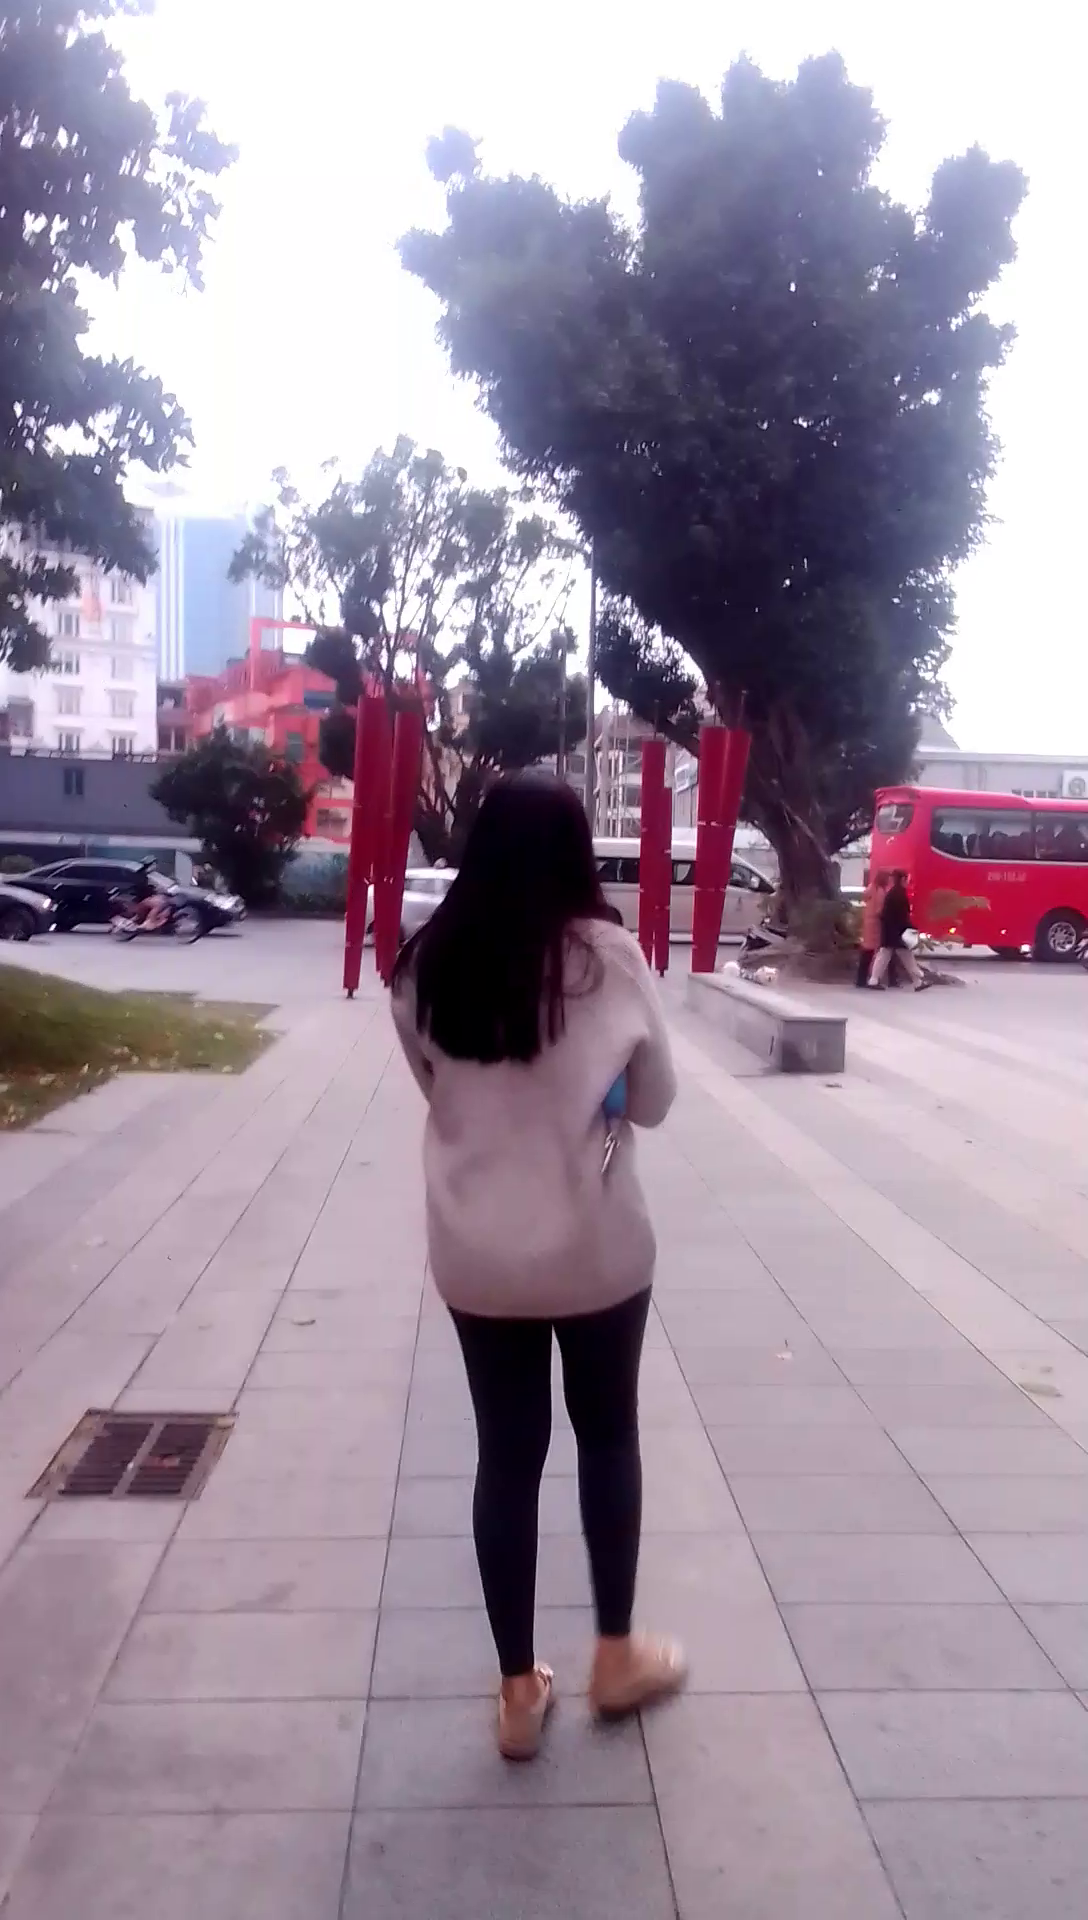

In [1]:
from body_matrix import load
from body_matrix import infer
from body_matrix import process
from body_matrix import measure

video, frames_counts, fps, sample_frame = load.video(
    "/Users/troydo42/Desktop/Raw_Vids/286021.mp4", 
    -90, 
    1
)
sample_frame

In [2]:
frames_counts

83

In [3]:
keypoints_model, keypoints_transform = load.keypoints_model("cpu")
selected_box, keypoints = infer.detect_main_target(
	sample_frame, "cpu", 0.8, keypoints_model, keypoints_transform
)

Found  3  person in the frame
Distances:  [4.6946258544921875, 357.71270751953125, 328.79632568359375]
Areas:  [309102.5849272795, 7238.688030660152, 4190.567056313157]
FOCUSES:  [65841.79325632645, 20.23603824660022, 12.745176052684391]
Select keypoint index 0


In [4]:
segment_model, segment_transform = load.segment_model("cpu")
mask, mask_image, bool_mask = infer.segment_selected_target(
	sample_frame, "cpu", selected_box, 0.99, segment_model, segment_transform
)

Found  3  person in the frame
[384.28985595703125, 757.6371459960938, 687.038330078125, 1751.9239501953125]
[384.4972839355469, 760.8311767578125, 694.1134643554688, 1759.17236328125]
[868.923583984375, 872.0135498046875, 930.5077514648438, 992.1439819335938]
[384.4972839355469, 760.8311767578125, 694.1134643554688, 1759.17236328125]
[863.081787109375, 787.0054931640625, 1087.1761474609375, 962.7617797851562]
[384.4972839355469, 760.8311767578125, 694.1134643554688, 1759.17236328125]
[6.365538989785575, 487.26694569690574, 581.5996742797215]
6.365538989785575 0


In [5]:
selected_kps = process.keypoints_filter(
	['left_ear','right_ear'], 
	keypoints
)

In [6]:
segment_contours = process.segmentation_contour(
    sample_frame, 
    bool_mask
)

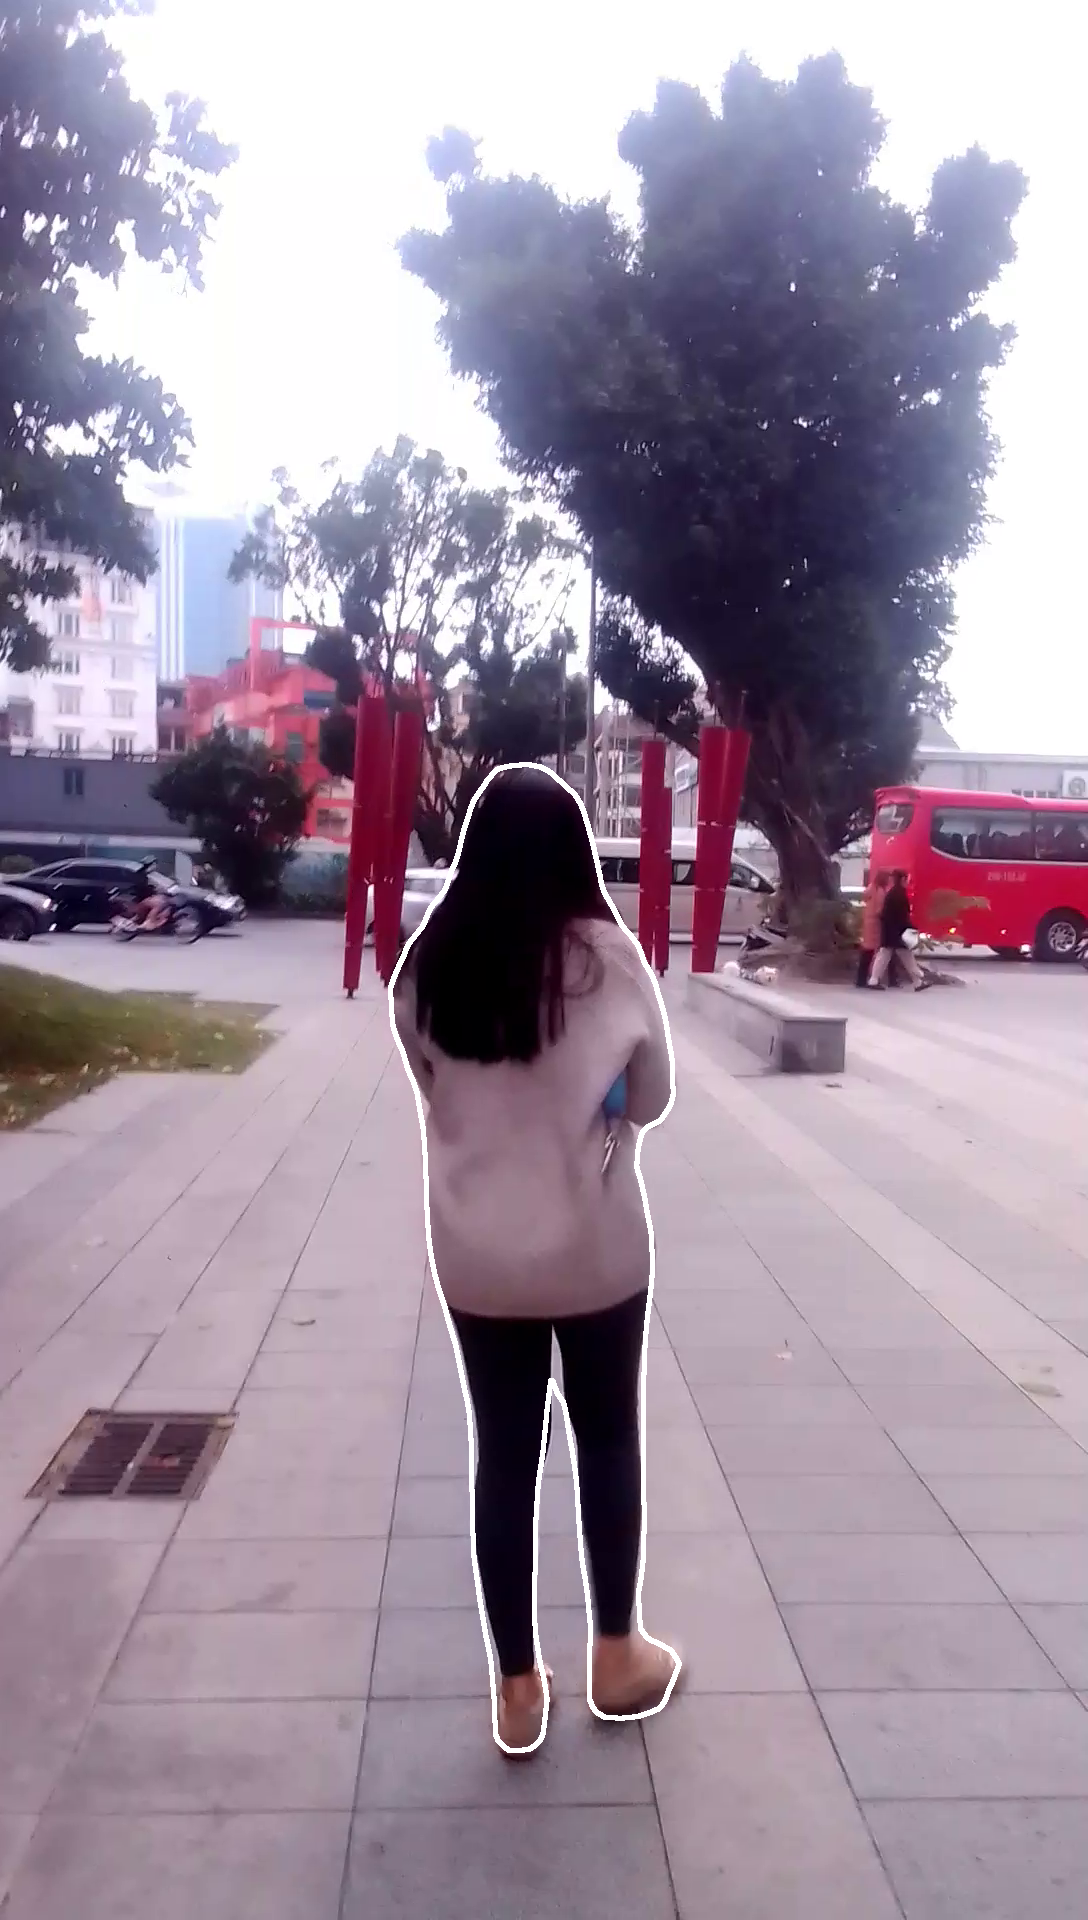

In [7]:
from body_matrix import draw

contoured_image = draw.segmentation_contour(
    contour_pixels = segment_contours, 
    contour_color = "#ffffff",
    contour_size=2,
    font="/content/drive/MyDrive/Body_Matrix/Roboto-Bold.ttf", 
    image=sample_frame
)

contoured_image

In [8]:
selected_kps

{'left_ear': [480.2622985839844, 849.3009033203125],
 'right_ear': [572.4271240234375, 850.7393798828125]}

In [9]:
middle_ear = measure.find_middle_point(
    selected_kps['left_ear'], 
    selected_kps['right_ear']
)

head_width = measure.two_points_distance(
    selected_kps['left_ear'], 
    selected_kps['right_ear']
)

crown_width = int(head_width*1.6)
crown_height = int(head_width*0.8)
crown_size = (crown_width,crown_height)

print(middle_ear, crown_size)

(526.3447113037109, 850.0201416015625) (147, 73)


In [10]:
len(segment_contours)

3358

In [11]:
top_head = ()
for contour_point in segment_contours:
    if int(contour_point[0]) == int(middle_ear[0]) and int(contour_point[1]) < int(middle_ear[1]):
        top_head = (contour_point[0], contour_point[1])
        print("TOP HEAD", contour_point)
        

TOP HEAD [526, 764]


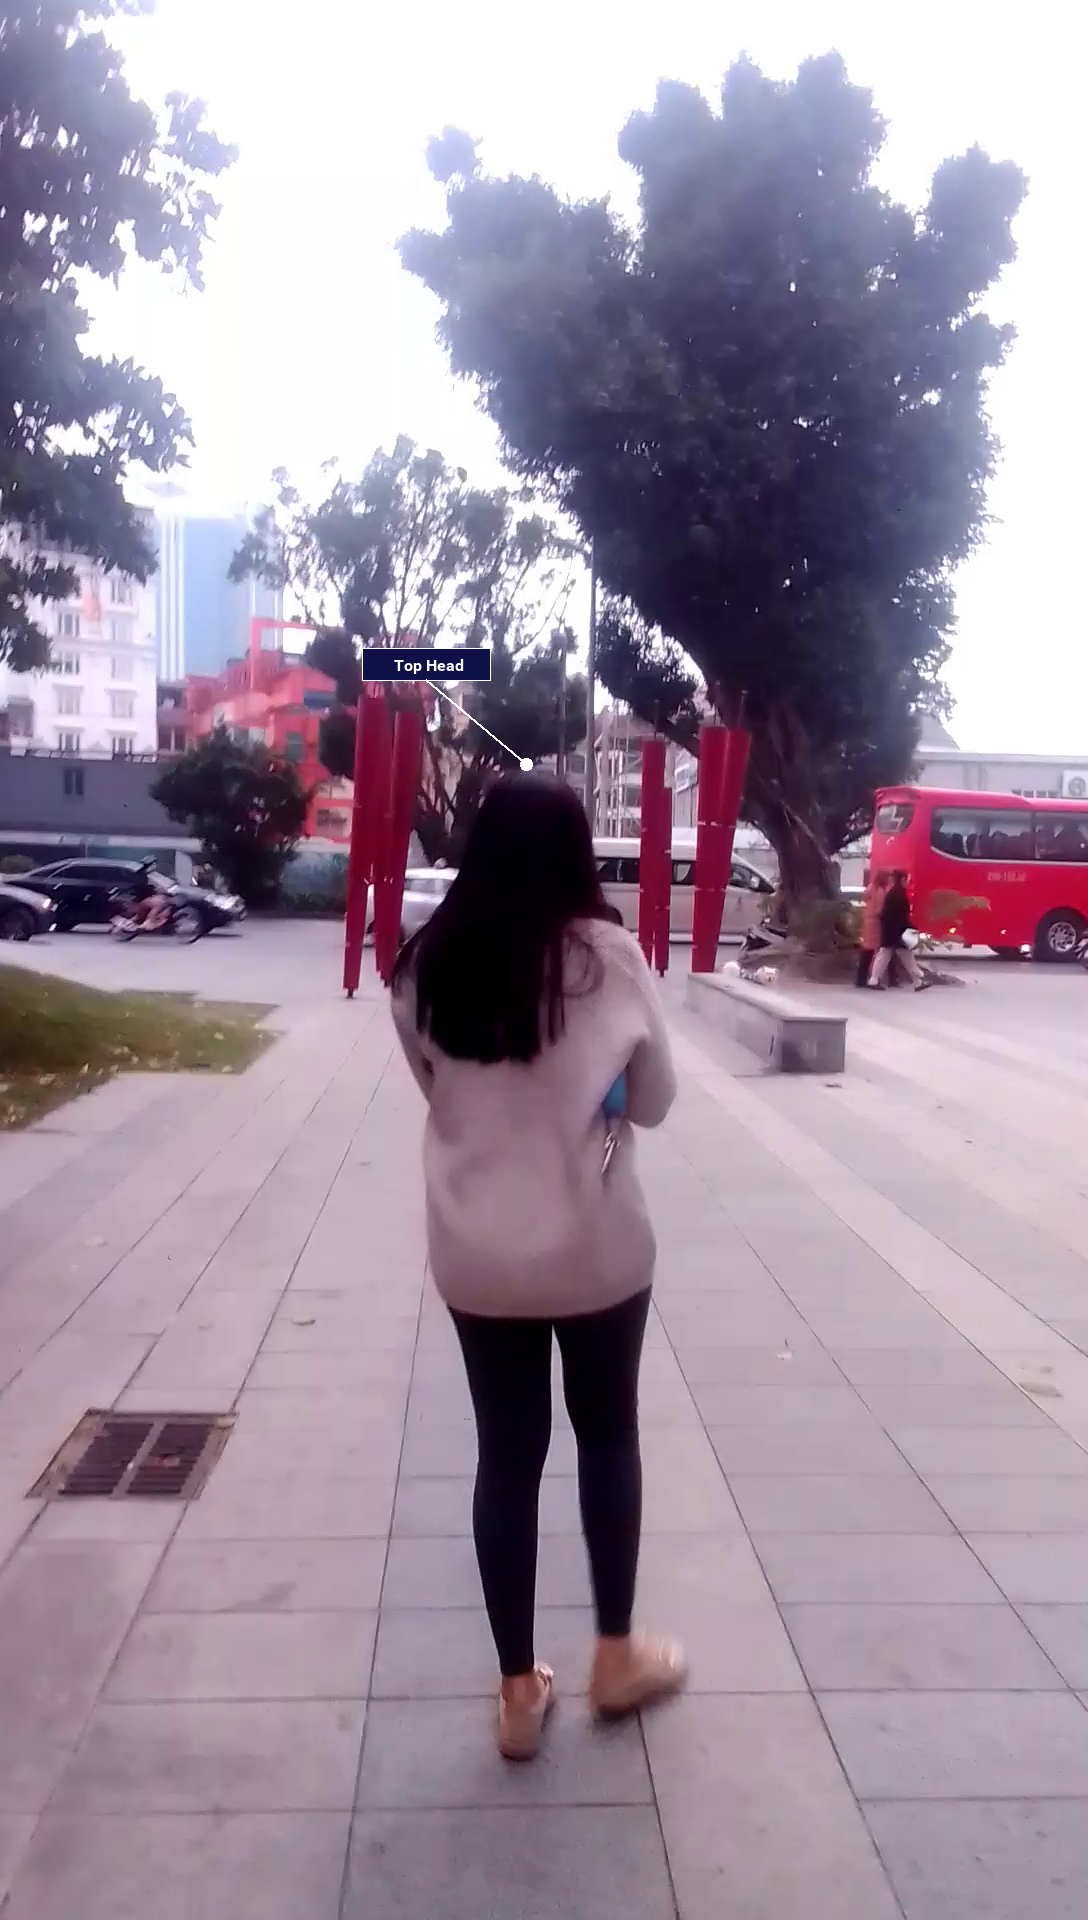

In [12]:
float_sample = draw.floating_rectangle_label(
        image=sample_frame, 
        longitude_coordinate=middle_ear[0],
        point=top_head, 
        label_text="Top Head", 
        label_size=16, 
        label_color="#ffffff", 
        label_font="/Users/troydo42/Desktop/Body_Matrixes/Roboto-Bold.ttf",
        background_color="#11114A"
) 

float_sample

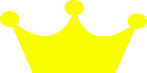

In [14]:
# Importing Image module from PIL package
from PIL import Image

crown = Image.open("/Users/troydo42/Desktop/Body_Matrix/src/crown.png")
crown = crown.resize(crown_size)
crown

In [ ]:
top_head

In [ ]:
crown.width

In [ ]:
from PIL import ImageDraw, ImageFont

scored = crown.copy()
draw = ImageDraw.Draw(scored) 
font_size = int(crown.width/5)
font = ImageFont.truetype("/Users/troydo42/Desktop/Body_Matrixes/Roboto-Bold.ttf", font_size)
draw.text(
    (crown_width/4,crown_height/2), 
    '1234',
    fill="#FF0000",
    font=font,
    align="center"
)

scored

In [ ]:
crown_position = (
    int(top_head[0] - crown_width/2), 
    int(top_head[1] - crown_height)
)

In [ ]:
# pasting im2 on im1
crowned = sample_frame.copy()
crowned.paste(scored, crown_position, scored)
crowned